In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


In [27]:
generator = ImageDataGenerator(rescale=1/255)

#generator = ImageDataGenerator(rescale=1/255)

#Test_generator = ImageDataGenerator()


IMAGE_WIDTH=IMAGE_HEIGHT=150

train_dataset = generator.flow_from_directory("F:/Research/Tomograms interpolation",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          #color_mode = 'rgb',
                                          class_mode = 'binary',
                                          subset = 'training',
                                          shuffle=True,
                                          seed = 42
                                         )
                                   
val_dataset = generator.flow_from_directory("F:/Research/val",
                                          target_size=(150,150),
                                          batch_size =32,
                                          #color_mode = 'rgb',
                                          #subset = 'validation',
                                          class_mode = 'binary')

#Test_dataset = Test_generator.flow_from_directory('F:/Research/val',target_size=(150,150))


Found 6868 images belonging to 2 classes.
Found 103 images belonging to 2 classes.


In [35]:
print(train_dataset.class_indices)

{'infocus': 0, 'outfocus': 1}


In [28]:
num_classes = 2
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(218,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [30]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
epochs = 15
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/15
215/215 [==============================] - 167s 777ms/step - loss: 0.2500 - accuracy: 0.8907 - val_loss: 0.5949 - val_accuracy: 0.7864
Epoch 2/15
215/215 [==============================] - 140s 653ms/step - loss: 0.0716 - accuracy: 0.9707 - val_loss: 0.5957 - val_accuracy: 0.8447
Epoch 3/15
215/215 [==============================] - 84s 391ms/step - loss: 0.0410 - accuracy: 0.9853 - val_loss: 0.6672 - val_accuracy: 0.8155
Epoch 4/15
215/215 [==============================] - 53s 248ms/step - loss: 0.0252 - accuracy: 0.9917 - val_loss: 0.5005 - val_accuracy: 0.8544
Epoch 5/15
215/215 [==============================] - 50s 234ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.5813 - val_accuracy: 0.8835
Epoch 6/15
215/215 [==============================] - 51s 235ms/step - loss: 0.0111 - accuracy: 0.9968 - val_loss: 0.7656 - val_accuracy: 0.8544
Epoch 7/15
215/215 [==============================] - 51s 238ms/step - loss: 0.0034 - accuracy: 0.9985 - val_loss: 0.8592 - val_

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)


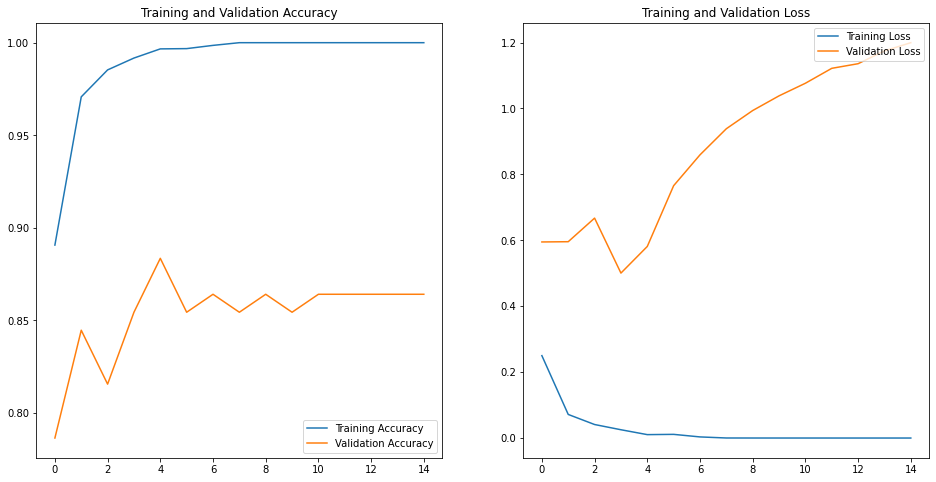

In [36]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [61]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)

    X = np.expand_dims(Y,axis=0)
    
    val = model.predict(X)
    print(val)
    if val == 0:
        
        plt.xlabel("infocus",fontsize=30)
        
    
    elif val == 1:
        
        plt.xlabel("outfocus",fontsize=30)

[[1.]]


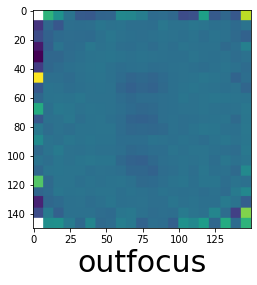

In [139]:
zplane = 80
#interpolation = 'bessel'
predictImage('F:/Research/Test/multi_lead_constrained_none_img{}.png'.format(zplane))
#predictImage(r'F:/Research/val/{}_img{}.png'.format(interpolation,pre_image))

In [66]:
def getFocus(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    z = int(filename.split("_img")[-1].split(".")[0])
   # plt.imshow(img1)
 
    Y = image.img_to_array(img1)

    X = np.expand_dims(Y,axis=0)
    
    val = model.predict(X)
    print(z)
    if val == 0:
        return "infocus", z
    #    plt.xlabel("infocus",fontsize=30)
        
    
    elif val == 1:
        return "outfocus", z
        #plt.xlabel("outfocus",fontsize=30)#
    
    else:
        return "confused", z

In [55]:
direc = "F:/Research/Test"

import glob

focus_label = []
z_plane = []

for pic in glob.glob(direc+"/*png"):
    f, z = getFocus(pic)
    focus_label.append(f)
    z_plane.append(z)

10
100
101
102
103
104
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
25
26
27
28
29
3
30
31
32
33
34
35
36
37
38
39
4
40
41
42
43
44
45
46
47
48
49
5
50
51
52
53
54
55
56
57
58
59
6
60
61
62
63
64
65
66
67
68
69
7
70
71
72
73
74
75
76
77
78
79
8
80
81
82
83
84
85
86
87
88
89
9
90
91
92
93
94
95
96
97
98
99


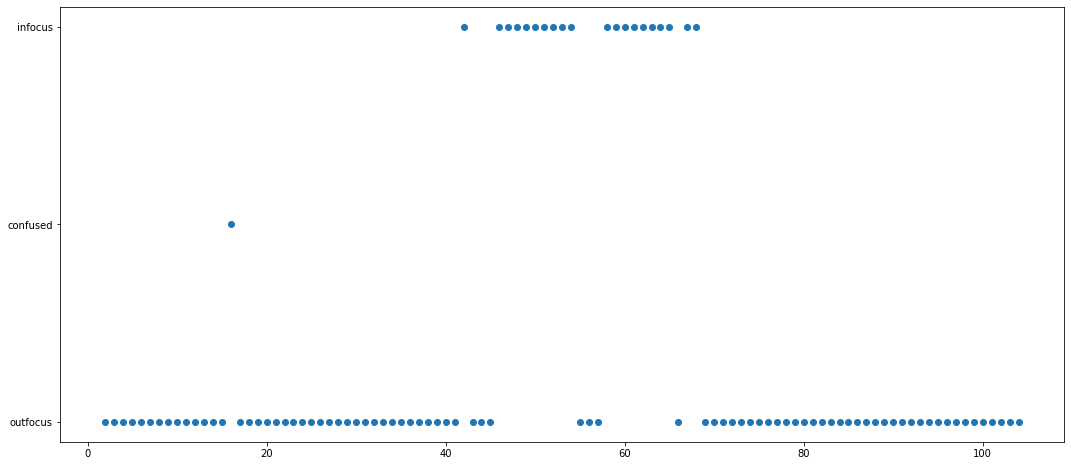

In [57]:
plt.figure(figsize=(18,8))
plt.scatter(z_plane, focus_label)
plt.show()